```sql
SELECT count(users.id) FROM users inner join employee_records on users.employee_record_id = employee_records.id WHERE date(users.created) <= '2020-09-31' and employee_records.gender = 2; SELECT COUNT(`id`) FROM `employee_records` WHERE `gender`= 2 AND `created` <= '2020-11-30 23:59:59'
```

In [1]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
users_table_columns_dict = {
    '1': 'id',
    '2': 'username',
    '3': 'password',
    '4': 'user_alias',
    '5': 'hash_change_password',
    '6': 'user_role_id',
    '7': 'is_admin',
    '8': 'active',
    '9': 'user_status',
    '10': 'is_email_verified',
    '11': 'email_verify_code',
    '12': 'verification_date',
    '13': 'ssn',
    '14': 'force_password_change',
    '15': 'last_password_change',
    '16': 'created',
    '17': 'modified',
    '18': 'created_by',
    '19': 'modified_by',
    '20': 'photo',
    '21': 'employee_record_id',
}
users_table_columns_list = list(users_table_columns_dict.values())
users_table_columns = users_table_columns_list
# for key in nisponno_records_table_columns_dict.keys():
#     value = 

len(users_table_columns)


21

## Checking column length consistency

In [3]:
# users_df = pd.read_csv('../Data/users_24_11_2021.csv')
# if len(users_table_columns) != users_df.shape[1]: 
#     print(f"previous column length: {len(users_table_columns)}, current column_length {users_df.shape[1]}")
#     raise ValueError('office table attribute added or removed')

In [4]:
def load_users_df():
    users_df = pd.read_csv('../Data/users_24_11_2021.csv', names=users_table_columns)
    return users_df

In [5]:
employee_records_table_columns_dict = {
    '1': 'id',
    '2': 'name_eng',
    '3': 'name_bng',
    '4': 'father_name_eng',
    '5': 'father_name_bng',
    '6': 'mother_name_eng',
    '7': 'mother_name_bng',
    '8': 'date_of_birth',
    '9': 'nid',
    '10': 'nid_valid',
    '11': 'bcn',
    '12': 'ppn',
    '13': 'gender',
    '14': 'religion',
    '15': 'blood_group',
    '16': 'marital_status',
    '17': 'personal_email',
    '18': 'personal_mobile',
    '19': 'alternative_mobile',
    '20': 'is_cadre',
    '21': 'employee_grade',
    '22': 'employee_cadre_id',
    '23': 'employee_batch_id',
    '24': 'identity_no',
    '25': 'appointment_memo_no',
    '26': 'joining_date',
    '27': 'service_rank_id',
    '28': 'service_grade_id',
    '29': 'service_ministry_id',
    '30': 'service_office_id',
    '31': 'current_office_ministry_id',
    '32': 'current_office_layer_id',
    '33': 'current_office_id',
    '34': 'current_office_unit_id',
    '35': 'current_office_joining_date',
    '36': 'current_office_designation_id',
    '37': 'current_office_address',
    '38': 'e_sign',
    '39': 'd_sign',
    '40': 'image_file_name',
    '41': 'status',
    '42': 'default_sign',
    '43': 'hard_signature',
    '44': 'soft_signature',
    '45': 'cert_id',
    '46': 'cert_type',
    '47': 'cert_provider',
    '48': 'cert_serial',
    '49': 'created_by',
    '50': 'modified_by',
    '51': 'created',
    '52': 'modified',
}

employee_records_table_columns_list = list(employee_records_table_columns_dict.values())
employee_records_table_columns = employee_records_table_columns_list
# for key in nisponno_records_table_columns_dict.keys():
#     value = 

len(employee_records_table_columns)

52

## Checking column length consistency

In [6]:

# employee_records_df = pd.read_csv('../Data/employee_records_24_11_2021.csv')
# if len(employee_records_table_columns) != employee_records_df.shape[1]: 
#     print(f"previous column length: {len(employee_records_table_columns)}, current column_length {employee_records_df.shape[1]}")
#     raise ValueError('office table attribute added or removed')

In [7]:
def load_employee_records_df():
    employee_records_df = pd.read_csv('../Data/employee_records_24_11_2021.csv', names=employee_records_table_columns)
    return employee_records_df

In [8]:
# users_df = pd.read_csv('../Data/users.csv', names=users_table_columns)
users_df = load_users_df() 
# employee_records_df = pd.read_csv('../Data/employee_records.csv', names=employee_records_table_columns)
employee_records_df = load_employee_records_df() 
users_df.shape
employee_records_df.shape
# users_df.columns
# employee_records_df.columns

/tmp/ipykernel_35558/160359744.py:2: DtypeWarning: Columns (1,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  users_df = load_users_df()
/tmp/ipykernel_35558/160359744.py:4: DtypeWarning: Columns (34,36,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  employee_records_df = load_employee_records_df()


(109138, 21)

(110356, 52)

In [9]:

# observing primary key
"min_id", min(users_df.id.values)
"max_id", max(users_df.id.values)
"table shape", users_df.shape


"min_id", min(employee_records_df.id.values)
"max_id", max(employee_records_df.id.values)
"table shape", employee_records_df.shape

('min_id', 1)

('max_id', 221029)

('table shape', (109138, 21))

('min_id', 30)

('max_id', 352969)

('table shape', (110356, 52))

In [10]:
new_users_df = users_df[['id',
    'username',
    'user_role_id',
    'is_admin',
    'active',
    'user_status',
    'created',
    'modified',
    'employee_record_id']]
# employee_records_df = pd.read_csv('./Data/employee_records.csv', names=employee_records_table_columns)
new_employee_records_df = employee_records_df[['id', 'name_eng', 'gender', 'created', 'modified']]


In [10]:
# users_gender_df = pd.merge(new_users_df, new_employee_records_df, left_on=['employee_record_id'], right_on=['id'],  suffixes=('_users', '_employee'))
# users_gender_df.shape
# users_gender_df.columns

In [11]:
# Extract mandatory attributes for offices graph analysis
# nisponno_records_df = load_nisponno_records_df()
users_gender_df = pd.merge(new_users_df, new_employee_records_df, left_on=['employee_record_id'], right_on=['id'],  suffixes=('_users', '_employee'))
print(f"Initial dataframe shape {users_gender_df.shape}")
# nisponno_records_df = nisponno_records_df[['id', 'upokarvogi', 'created']] 
# remove null values
# users_gender_df = users_gender_df.loc[users_gender_df.created_users.notnull()]
# print(f"dataframe shape after removing created null value {users_gender_df.shape}")
# # add new column: cretead_new as datetime field from created column
# users_gender_df['created_users'] = pd.to_datetime(users_gender_df['created_users'], errors='coerce')
# # errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#     # If ‘raise’, then invalid parsing will raise an exception.
#     # If ‘coerce’, then invalid parsing will be set as NaT.
#     # If ‘ignore’, then invalid parsing will return the input.
# users_gender_df.shape
# # again remove null values based on created field
# users_gender_df = users_gender_df.loc[users_gender_df.created_users.notnull()]
# users_gender_df.shape

Initial dataframe shape (109128, 14)


In [14]:
# users_gender_df.created_users.isnull().sum()
pd.to_datetime(users_gender_df.created_users)

ParserError: year 0 is out of range: 0000-00-00 00:00:00

In [10]:
# Extract years and months from created column
created_users_datetime_index = pd.DatetimeIndex(users_gender_df['created_users'])
years = created_users_datetime_index.year.values.astype(str)
months = created_users_datetime_index.month.values.astype(str)
type(years)
type(months)
set(years)
set(months)

numpy.ndarray

numpy.ndarray

{'2015', '2016', '2017', '2018', '2019', '2020', '2021'}

{'1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'}

In [11]:
# type(years[0])
users_gender_df['year'] = years
users_gender_df['month'] = months
users_gender_df.shape

(109026, 16)

In [14]:
# Everything
# users_df = load_users_df() 
# # employee_records_df = pd.read_csv('../Data/employee_records.csv', names=employee_records_table_columns)
# employee_records_df = load_employee_records_df() 
# print(f"users dataframe shape: {users_df.shape}")
# print(f"employee records dataframe shape: {employee_records_df.shape}")
# new_users_df = users_df[['id',
#     'created',
#     'modified',
#     'employee_record_id']]
# new_employee_records_df = employee_records_df[['id', 'gender', 'created', 'modified']]

# users_gender_df = pd.merge(new_users_df, new_employee_records_df, left_on=['employee_record_id'], right_on=['id'],  suffixes=('_users', '_employee'))
# print(f"Initial dataframe shape {users_gender_df.shape}")
# # nisponno_records_df = nisponno_records_df[['id', 'upokarvogi', 'created']] 
# # remove null values
# users_gender_df = users_gender_df.loc[users_gender_df.created_users.notnull()]
# print(f"dataframe shape after removing created null value {users_gender_df.shape}")
# # add new column: cretead_new as datetime field from created column
# users_gender_df['created_users'] = pd.to_datetime(users_gender_df['created_users'], errors='coerce')
# # errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#     # If ‘raise’, then invalid parsing will raise an exception.
#     # If ‘coerce’, then invalid parsing will be set as NaT.
#     # If ‘ignore’, then invalid parsing will return the input.
# users_gender_df.shape
# # again remove null values based on created field
# users_gender_df = users_gender_df.loc[users_gender_df.created_users.notnull()]
# users_gender_df.shape

## মোট নথি ব্যবহারকারী (পুরুষ)

In [12]:
# Extract male users

male_nothi_users_df = users_gender_df[users_gender_df.gender == 1]
male_nothi_users_df.to_csv('../Cleaned_data/male_nothi_users.csv', index=False)
male_nothi_users_df.shape
male_nothi_users_df.columns

(92137, 16)

Index(['id_users', 'username', 'user_role_id', 'is_admin', 'active',
       'user_status', 'created_users', 'modified_users', 'employee_record_id',
       'id_employee', 'name_eng', 'gender', 'created_employee',
       'modified_employee', 'year', 'month'],
      dtype='object')

In [13]:

month_map ={
    '1': 'January',
    '01': 'January',
    '2': 'February',
    '02': 'February',
    '3': 'March',
    '03': 'March',
    '4': 'April',
    '04': 'April',
    '5': 'May',
    '05': 'May',
    '6': 'June',
    '06': 'June',
    '7': 'July',
    '07': 'July',
    '8': 'August',
    '08': 'August',
    '9': 'September',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December',
    'unknown': 'unknown',
}

# Saving file as json


In [15]:
month_list =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October','November', 'December', 'unknown' ]
male_nothi_users = {}

dataframe_year_by = male_nothi_users_df.groupby('year')

for year, year_frame in dataframe_year_by:
    year = str(year)
    # year, year_frame.shape
    
    month_dict = {}

    month_group_by = year_frame.groupby('month')
    for month, month_frame in month_group_by:

        # mg, mf.shape[0]
        month = str(month)
        month = month_map[month]
        month_dict[month] = month_frame.shape[0]
    month_dict = dict(sorted(month_dict.items(), key=lambda x:month_list.index(x[0])))
    dic = {'count': year_frame.shape[0], 'month_map': month_dict}
    male_nothi_users[year] = dic

print(male_nothi_users)

{'2015': {'count': 14, 'month_map': {'December': 14}}, '2016': {'count': 12209, 'month_map': {'January': 37, 'February': 75, 'March': 573, 'April': 228, 'May': 830, 'June': 1350, 'July': 1068, 'August': 2115, 'September': 1422, 'October': 1274, 'November': 1850, 'December': 1387}}, '2017': {'count': 22757, 'month_map': {'January': 2154, 'February': 2537, 'March': 2918, 'April': 1887, 'May': 2010, 'June': 1731, 'July': 1845, 'August': 1900, 'September': 1469, 'October': 1515, 'November': 1696, 'December': 1095}}, '2018': {'count': 20093, 'month_map': {'January': 1784, 'February': 1578, 'March': 1862, 'April': 2163, 'May': 1884, 'June': 1190, 'July': 2364, 'August': 1635, 'September': 1195, 'October': 1337, 'November': 1419, 'December': 1682}}, '2019': {'count': 18684, 'month_map': {'January': 1750, 'February': 1408, 'March': 1344, 'April': 1593, 'May': 1475, 'June': 1467, 'July': 1711, 'August': 1271, 'September': 2083, 'October': 1828, 'November': 1408, 'December': 1346}}, '2020': {'co

In [16]:
import json


dictionary = male_nothi_users

with open('../Cleaned_data/male_nothi_users.json', 'w', encoding='utf-8') as f:
    json.dump(dictionary, f, ensure_ascii=False, indent=4)

with open('../Cleaned_data/male_nothi_users.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)
    print(data)
    breakpoint()


{'2015': {'count': 14, 'month_map': {'December': 14}}, '2016': {'count': 12209, 'month_map': {'January': 37, 'February': 75, 'March': 573, 'April': 228, 'May': 830, 'June': 1350, 'July': 1068, 'August': 2115, 'September': 1422, 'October': 1274, 'November': 1850, 'December': 1387}}, '2017': {'count': 22757, 'month_map': {'January': 2154, 'February': 2537, 'March': 2918, 'April': 1887, 'May': 2010, 'June': 1731, 'July': 1845, 'August': 1900, 'September': 1469, 'October': 1515, 'November': 1696, 'December': 1095}}, '2018': {'count': 20093, 'month_map': {'January': 1784, 'February': 1578, 'March': 1862, 'April': 2163, 'May': 1884, 'June': 1190, 'July': 2364, 'August': 1635, 'September': 1195, 'October': 1337, 'November': 1419, 'December': 1682}}, '2019': {'count': 18684, 'month_map': {'January': 1750, 'February': 1408, 'March': 1344, 'April': 1593, 'May': 1475, 'June': 1467, 'July': 1711, 'August': 1271, 'September': 2083, 'October': 1828, 'November': 1408, 'December': 1346}}, '2020': {'co

In [17]:

# observe nothi users (male) in every year 
male_nothi_users_year_by = male_nothi_users_df.groupby('year')['id_users'].count()
male_nothi_users_year_by


year
2015       14
2016    12209
2017    22757
2018    20093
2019    18684
2020    11533
2021     6847
Name: id_users, dtype: int64

(array([1.2209e+04, 1.4000e+01, 0.0000e+00, 2.2757e+04, 0.0000e+00,
        2.0093e+04, 1.8684e+04, 0.0000e+00, 1.1533e+04, 6.8470e+03]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'years')

Text(0, 0.5, 'nothi users (male)')

Text(0.5, 1.0, 'nothi users (male) in year base')

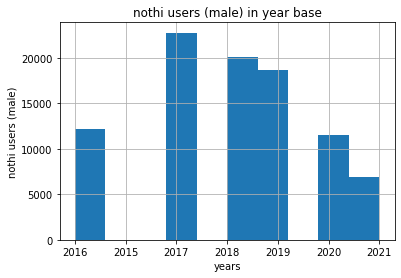

In [24]:

plt.hist(male_nothi_users_df['year'])


plt.xlabel('years')
plt.ylabel('nothi users (male)')
plt.title('nothi users (male) in year base')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [18]:
month_map ={
    '1': 'January',
    '01': 'January',
    '2': 'February',
    '02': 'February',
    '3': 'March',
    '03': 'March',
    '4': 'April',
    '04': 'April',
    '5': 'May',
    '05': 'May',
    '6': 'June',
    '06': 'June',
    '7': 'July',
    '07': 'July',
    '8': 'August',
    '08': 'August',
    '9': 'September',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December',
    'unknown': 'unknown',
}

In [22]:
# Generate general_series and drilldown series for bar graph
# general series: year: number of officess
male_nothi_users_year_by = male_nothi_users_df.groupby('year')
def generate_general_series_drilldown_series(dataframe_year_by, general_series_name):
    general_series = [
        
        {
            'name': general_series_name,
            'colorByPoint': True,
            'data': [],
        }
    ]
    drilldown_series = []

    for year, year_frame in dataframe_year_by:
        year = str(year)
        # year, year_frame.shape
        temporary_dict_general = {'name': year, 'y': year_frame.shape[0], 'drilldown': year}
        general_series[0]['data'].append(temporary_dict_general)
        temporary_dict_drilldown = {
            'name': year,
            'id': year,
            'data': [],
        }
        month_group_by = year_frame.groupby('month')
        for month, month_frame in month_group_by:
          
            # mg, mf.shape[0]
            month = str(month)
            month = month_map[month]

            lst = [month, month_frame.shape[0]]
            temporary_dict_drilldown['data'].append(lst)
        drilldown_series.append(temporary_dict_drilldown)
    return general_series, drilldown_series

general_series, drilldown_series = generate_general_series_drilldown_series(male_nothi_users_year_by, 'male_nothi_users')

In [23]:
general_series
# drilldown_series

[{'name': 'male_nothi_users',
  'colorByPoint': True,
  'data': [{'name': '2015', 'y': 14, 'drilldown': '2015'},
   {'name': '2016', 'y': 12209, 'drilldown': '2016'},
   {'name': '2017', 'y': 22757, 'drilldown': '2017'},
   {'name': '2018', 'y': 20093, 'drilldown': '2018'},
   {'name': '2019', 'y': 18684, 'drilldown': '2019'},
   {'name': '2020', 'y': 11533, 'drilldown': '2020'},
   {'name': '2021', 'y': 6847, 'drilldown': '2021'}]}]

## মোট নথি ব্যবহারকারী (মহিলা)

In [19]:
# Extract female users

female_nothi_users_df = users_gender_df[users_gender_df.gender != 1]
female_nothi_users_df.to_csv('../Cleaned_data/female_nothi_users.csv', index=False)


In [20]:
# observe nothi users (female) in every year 
female_nothi_users_year_by = female_nothi_users_df.groupby('year')['id_users'].count()
female_nothi_users_year_by

year
2015      29
2016    4950
2017    3300
2018    2712
2019    2977
2020    1707
2021    1214
Name: id_users, dtype: int64

(array([4950.,   29.,    0., 3300.,    0., 2712., 2977.,    0., 1707.,
        1214.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'years')

Text(0, 0.5, 'nothi users (female)')

Text(0.5, 1.0, 'nothi users (female) in year base')

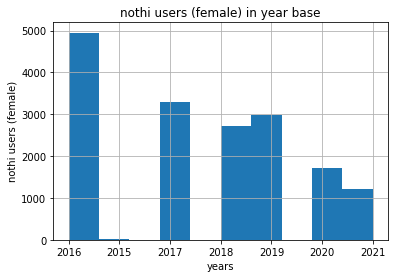

In [30]:
plt.hist(female_nothi_users_df['year'])


plt.xlabel('years')
plt.ylabel('nothi users (female)')
plt.title('nothi users (female) in year base')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [24]:
female_nothi_users_year_by = female_nothi_users_df.groupby('year')
general_series, drilldown_series = generate_general_series_drilldown_series(female_nothi_users_year_by, 'female_nothi_users')

In [33]:
general_series

[{'name': 'female_nothi_users',
  'colorByPoint': True,
  'data': [{'name': '2015', 'y': 29, 'drilldown': '2015'},
   {'name': '2016', 'y': 4950, 'drilldown': '2016'},
   {'name': '2017', 'y': 3300, 'drilldown': '2017'},
   {'name': '2018', 'y': 2712, 'drilldown': '2018'},
   {'name': '2019', 'y': 2977, 'drilldown': '2019'},
   {'name': '2020', 'y': 1707, 'drilldown': '2020'},
   {'name': '2021', 'y': 1214, 'drilldown': '2021'}]}]

In [26]:
month_list =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October','November', 'December', 'unknown' ]
female_nothi_users = {}

dataframe_year_by = female_nothi_users_df.groupby('year')

for year, year_frame in dataframe_year_by:
    year = str(year)
    # year, year_frame.shape
    
    month_dict = {}

    month_group_by = year_frame.groupby('month')
    for month, month_frame in month_group_by:

        # mg, mf.shape[0]
        month = str(month)
        month = month_map[month]
        month_dict[month] = month_frame.shape[0]
    month_dict = dict(sorted(month_dict.items(), key=lambda x:month_list.index(x[0])))
    dic = {'count': year_frame.shape[0], 'month_map': month_dict}
    female_nothi_users[year] = dic

print(female_nothi_users)

{'2015': {'count': 29, 'month_map': {'December': 29}}, '2016': {'count': 4950, 'month_map': {'January': 45, 'February': 42, 'March': 497, 'April': 183, 'May': 846, 'June': 1162, 'July': 765, 'August': 416, 'September': 232, 'October': 197, 'November': 324, 'December': 241}}, '2017': {'count': 3300, 'month_map': {'January': 447, 'February': 350, 'March': 424, 'April': 269, 'May': 268, 'June': 214, 'July': 236, 'August': 236, 'September': 205, 'October': 237, 'November': 237, 'December': 177}}, '2018': {'count': 2712, 'month_map': {'January': 270, 'February': 254, 'March': 239, 'April': 259, 'May': 191, 'June': 127, 'July': 273, 'August': 179, 'September': 161, 'October': 247, 'November': 235, 'December': 277}}, '2019': {'count': 2977, 'month_map': {'January': 295, 'February': 225, 'March': 175, 'April': 214, 'May': 179, 'June': 220, 'July': 316, 'August': 239, 'September': 345, 'October': 339, 'November': 244, 'December': 186}}, '2020': {'count': 1707, 'month_map': {'January': 242, 'Feb

In [27]:
import json


dictionary = female_nothi_users

with open('../Cleaned_data/female_nothi_users.json', 'w', encoding='utf-8') as f:
    json.dump(dictionary, f, ensure_ascii=False, indent=4)

with open('../Cleaned_data/female_nothi_users.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)
    print(data)
    breakpoint()

{'2015': {'count': 29, 'month_map': {'December': 29}}, '2016': {'count': 4950, 'month_map': {'January': 45, 'February': 42, 'March': 497, 'April': 183, 'May': 846, 'June': 1162, 'July': 765, 'August': 416, 'September': 232, 'October': 197, 'November': 324, 'December': 241}}, '2017': {'count': 3300, 'month_map': {'January': 447, 'February': 350, 'March': 424, 'April': 269, 'May': 268, 'June': 214, 'July': 236, 'August': 236, 'September': 205, 'October': 237, 'November': 237, 'December': 177}}, '2018': {'count': 2712, 'month_map': {'January': 270, 'February': 254, 'March': 239, 'April': 259, 'May': 191, 'June': 127, 'July': 273, 'August': 179, 'September': 161, 'October': 247, 'November': 235, 'December': 277}}, '2019': {'count': 2977, 'month_map': {'January': 295, 'February': 225, 'March': 175, 'April': 214, 'May': 179, 'June': 220, 'July': 316, 'August': 239, 'September': 345, 'October': 339, 'November': 244, 'December': 186}}, '2020': {'count': 1707, 'month_map': {'January': 242, 'Feb

# End End End

In [15]:
month_map ={
    '1': 'January',
    '01': 'January',
    '2': 'February',
    '02': 'February',
    '3': 'March',
    '03': 'March',
    '4': 'April',
    '04': 'April',
    '5': 'May',
    '05': 'May',
    '6': 'June',
    '06': 'June',
    '7': 'July',
    '07': 'July',
    '8': 'August',
    '08': 'August',
    '9': 'September',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December',
    'unknown': 'unknown',
}

In [16]:
# Generate general_series and drilldown series for bar graph
# general series: year: number of officess
offices_year_by = offices_df.groupby('year')
def generate_general_series_drilldown_series(dataframe_year_by, general_series_name):
    general_series = [
        
        {
            'name': general_series_name,
            'colorByPoint': True,
            'data': [],
        }
    ]
    drilldown_series = []

    for year, year_frame in dataframe_year_by:
        year = str(year)
        # year, year_frame.shape
        temporary_dict_general = {'name': year, 'y': year_frame.shape[0], 'drilldown': year}
        general_series[0]['data'].append(temporary_dict_general)
        temporary_dict_drilldown = {
            'name': year,
            'id': year,
            'data': [],
        }
        month_group_by = year_frame.groupby('month')
        for month, month_frame in month_group_by:
          
            # mg, mf.shape[0]
            month = str(month)
            month = month_map[month]

            lst = [month, month_frame.shape[0]]
            temporary_dict_drilldown['data'].append(lst)
        drilldown_series.append(temporary_dict_drilldown)
    return general_series, drilldown_series

general_series, drilldown_series = generate_general_series_drilldown_series(offices_year_by, 'offices')


In [17]:
general_series
drilldown_series

[{'name': 'offices',
  'colorByPoint': True,
  'data': [{'name': '2015', 'y': 41, 'drilldown': '2015'},
   {'name': '2016', 'y': 2922, 'drilldown': '2016'},
   {'name': '2017', 'y': 3227, 'drilldown': '2017'},
   {'name': '2018', 'y': 2379, 'drilldown': '2018'},
   {'name': '2019', 'y': 3821, 'drilldown': '2019'},
   {'name': '2020', 'y': 4030, 'drilldown': '2020'},
   {'name': '2021', 'y': 509, 'drilldown': '2021'}]}]

[{'name': '2015',
  'id': '2015',
  'data': [['October', 17], ['November', 2], ['December', 16], ['August', 6]]},
 {'name': '2016',
  'id': '2016',
  'data': [['January', 3],
   ['October', 581],
   ['November', 85],
   ['December', 190],
   ['February', 3],
   ['March', 28],
   ['April', 12],
   ['May', 129],
   ['June', 248],
   ['July', 1383],
   ['August', 151],
   ['September', 109]]},
 {'name': '2017',
  'id': '2017',
  'data': [['January', 205],
   ['October', 118],
   ['November', 314],
   ['December', 115],
   ['February', 594],
   ['March', 298],
   ['April', 147],
   ['May', 575],
   ['June', 306],
   ['July', 186],
   ['August', 223],
   ['September', 146]]},
 {'name': '2018',
  'id': '2018',
  'data': [['January', 328],
   ['October', 108],
   ['November', 94],
   ['December', 132],
   ['February', 213],
   ['March', 207],
   ['April', 324],
   ['May', 306],
   ['June', 169],
   ['July', 359],
   ['August', 108],
   ['September', 31]]},
 {'name': '2019',
  'id': '2019',
  